Train size: (120, 4)
Test size: (30, 4)

================ MODEL PERFORMANCE ================


>>> Linear Kernel
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-Score : 1.0

>>> Polynomial (degree=3) Kernel
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-Score : 1.0

>>> RBF Kernel
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-Score : 1.0


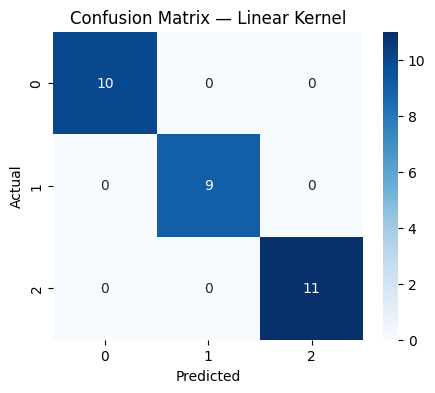

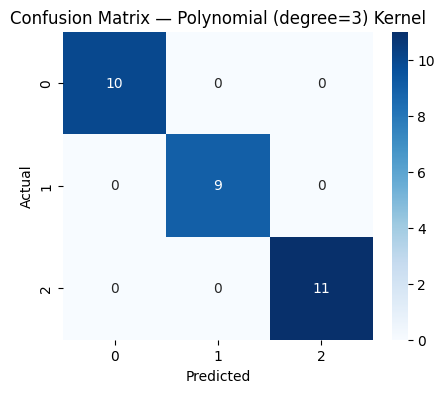

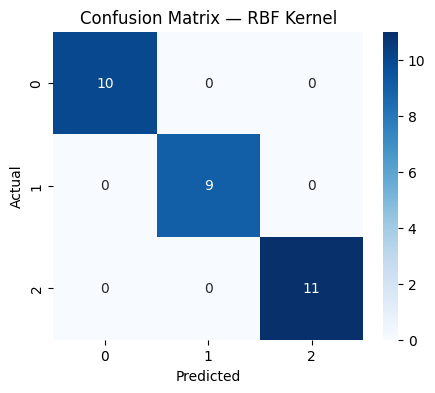


Best Performing Kernel: Linear
Reason: It achieved the highest accuracy.


In [2]:

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


kernels = {
    "Linear": SVC(kernel='linear'),
    "Polynomial (degree=3)": SVC(kernel='poly', degree=3),
    "RBF": SVC(kernel='rbf')
}

results = {}

for name, model in kernels.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='macro'),
        "Recall": recall_score(y_test, y_pred, average='macro'),
        "F1-Score": f1_score(y_test, y_pred, average='macro'),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }


print("\n================ MODEL PERFORMANCE ================\n")
for name, metrics in results.items():
    print(f"\n>>> {name} Kernel")
    print("Accuracy :", metrics["Accuracy"])
    print("Precision:", metrics["Precision"])
    print("Recall   :", metrics["Recall"])
    print("F1-Score :", metrics["F1-Score"])


for name, metrics in results.items():
    plt.figure(figsize=(5,4))
    sns.heatmap(metrics["Confusion Matrix"], annot=True, cmap="Blues", fmt="d")
    plt.title(f"Confusion Matrix — {name} Kernel")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


best_kernel = max(results, key=lambda k: results[k]["Accuracy"])
print("\n===================================================")
print("Best Performing Kernel:", best_kernel)
print("Reason: It achieved the highest accuracy.")
print("===================================================")